![](./pics/asteroids-header.jpg)

# Asteroid

Here we will talk about asteriods and the math behind them for the game.

# Random Numbers

Using the `random` library, python can select select pseudo-random numbers. We say *pseudo-random* because it is a computer and follows an algorithm so it *appears* random to a human but is not *truely* random

- `randrange(a,b)`: will select an `int` (whole number) between `a` and `b`
- `uniform(a,b)`: returns a random `float` (decimal) number between `a` and `b`
- `gauss(mean, std)`: this is a bell shaped plot with an average value (mean) and a standard deviation (or how far away from the mean)

In [117]:
from matplotlib import pyplot as plt
import random
import numpy as np

# `randrange(a,b)`

In [14]:
random.randrange(0,4)

2

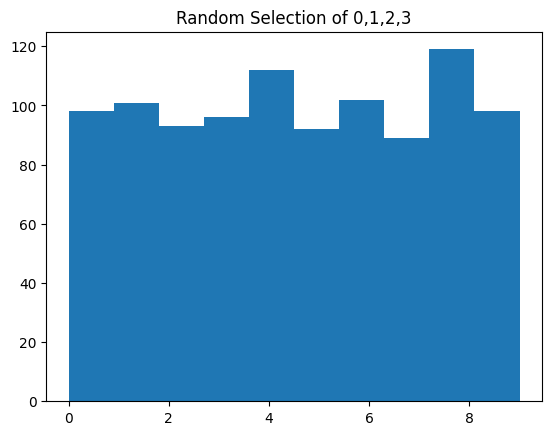

In [31]:
# this looks like a fairly even selection between 0,1,2,3
random.seed(1)
# note, this goes form 0 to but not including 4, so 0,1,2,3
pts = [random.randrange(0,4) for _ in range(1000)]
plt.hist(pts, 4)
plt.title("Random Selection of 0,1,2,3");

Text(0, 0.5, 'pts2')

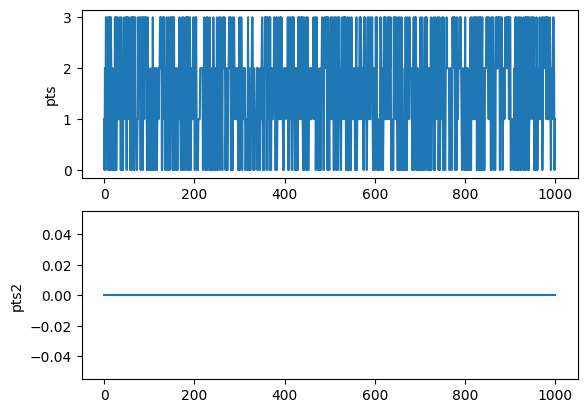

In [29]:
# if I pick the same seed, then it won't be random
random.seed(1)
pts2 = [random.randrange(0,4)-pts[i] for i in range(1000)]
plt.subplot(2,1,1);plt.plot(pts);plt.ylabel('pts')
plt.subplot(2,1,2);plt.plot(pts2);plt.ylabel('pts2')

# `uniform(a,b)`

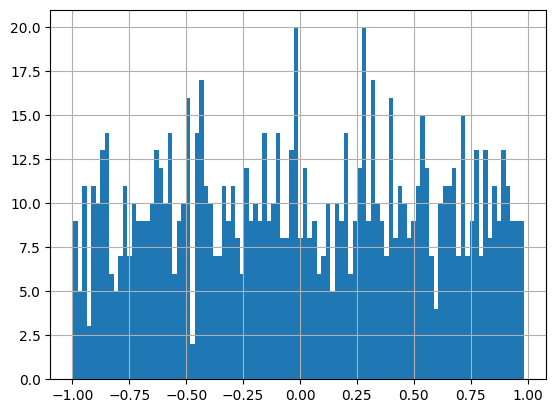

In [30]:
pts = [random.uniform(1,-1) for _ in range(1000)]
plt.hist(pts, 100)
plt.grid(True);

# `guass(mu,std)`

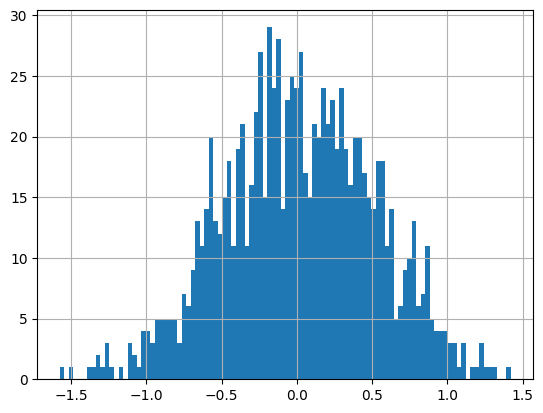

In [32]:
pts = [random.gauss(0,.5) for _ in range(1000)]
plt.hist(pts, 100)
plt.grid(True);

# Dynamics and Euler Integration

This is the simplest way for games to calculate an object's new position given a velocity and change in time ($\Delta t$)

$$
postion_{new} = position_{old} + velocity \cdot \Delta t
$$

In [3]:
class Ball:
    def __init__(self, x, y, vx, vy):
        self.x = x
        self.y = y
        self.vx = vx
        self.vy = vy

    def update(self, dt):
        self.x += self.vx*dt
        self.y += self.vy*dt

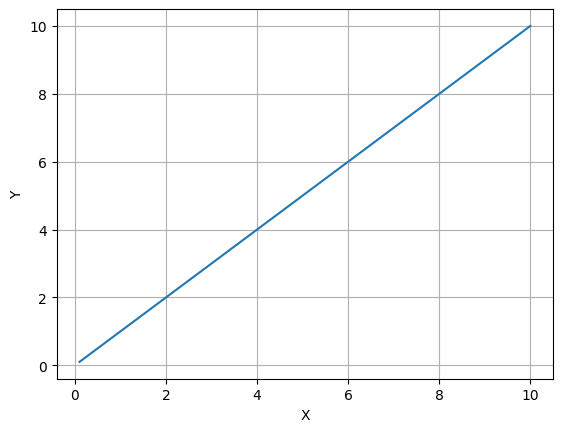

In [85]:
ball = Ball(0,0,1,1)
posx = []
posy = []
dt = .1

for i in range(100):
    ball.update(dt)
    posx.append(ball.x)
    posy.append(ball.y)

plt.plot(posx, posy)
plt.xlabel('X')
plt.ylabel('Y')
plt.grid(True)

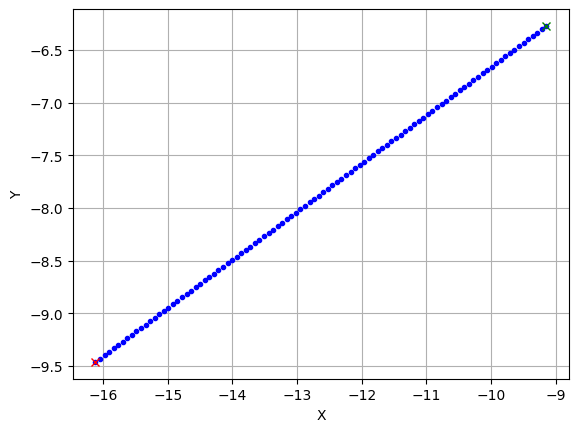

In [84]:
x = random.uniform(-10,10)
y = random.uniform(-10,10)
vx = random.uniform(-1,1)
vy = random.uniform(-1,1)

ball = Ball(x,y,vx,vy)
posx = []
posy = []
dt = .1

for i in range(100):
    ball.update(dt)
    posx.append(ball.x)
    posy.append(ball.y)

plt.plot(posx, posy, 'b.')
plt.plot(posx[0], posy[0], 'gx')
plt.plot(posx[-1], posy[-1], 'rx')
plt.xlabel('X')
plt.ylabel('Y')
plt.grid(True)

In [87]:
class Ball2:
    def __init__(self, x, y, vx, vy):
        self.x = x
        self.y = y
        self.vx = vx
        self.vy = vy

    def update(self, dt):
        """
        This will change the space between the blue points 
        in the plot now ... it won't be consistent.
        """
        std = 5
        a = random.gauss(0,std)
        b = random.gauss(0,std)
        self.vx += a
        self.vy += b
        self.x += self.vx*dt
        self.y += self.vy*dt

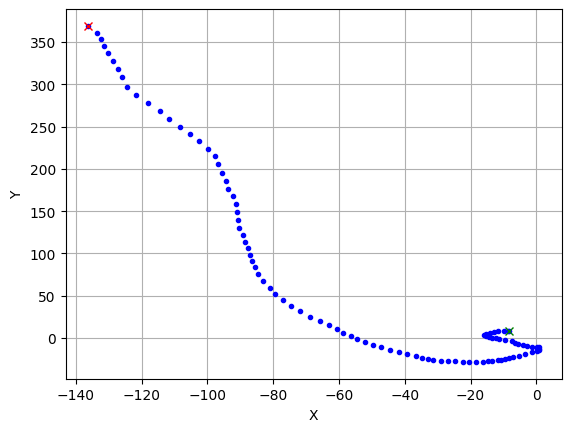

In [83]:
x = random.uniform(-10,10)
y = random.uniform(-10,10)
vx = random.uniform(-1,1)
vy = random.uniform(-1,1)

ball = Ball2(x,y,vx,vy)
posx = []
posy = []
dt = .1

for i in range(100):
    ball.update(dt)
    posx.append(ball.x)
    posy.append(ball.y)

plt.plot(posx, posy, 'b.')
plt.plot(posx[0], posy[0], 'gx')
plt.plot(posx[-1], posy[-1], 'rx')
plt.xlabel('X')
plt.ylabel('Y')
plt.grid(True);

## Asteriod Drawing

In `pygame` you will use `pygame.draw.polygon(surface, color, points, width=2)` to draw the asteriods. Instead of making 3 different sizes asteriods, we are going to make 1 and then scale it different sizes by multiplying it by 10, 20 or 30. To do this we will use a `numpy.array(list)` which will allow multiplication.

(1.049953877130557, 0.04995387713055696)
(0.8609463980867871, 0.8609463980867871)
(-0.2619950040688608, 0.7380049959311392)
(-0.5568632374400247, 0.8573503249330703)
(-0.9040915655635323, 0.09590843443646782)
(-0.8430010435299449, -0.8430010435299446)
(-0.40371281099168227, -1.403712810991682)
(0.39436577225820924, -1.019847790114886)


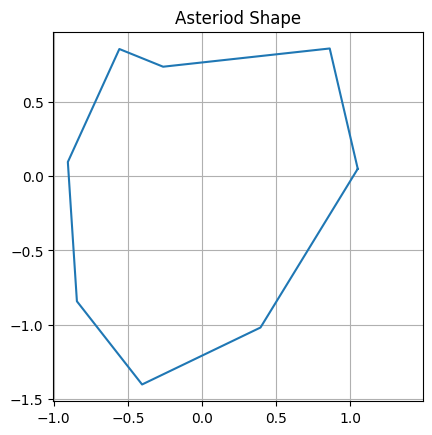

In [154]:
pts = []
num = 8
for i in range(num):
    # r = 0 # circle
    r = random.gauss(0,.2) # add randomness
    a = 360/num*np.pi/180*i
    p = (np.cos(a)+r, np.sin(a)+r,)
    print(p)
    pts.append(p)
pts.append(pts[0])
pts = np.array(pts)

plt.plot(pts[:,0], pts[:,1])
plt.title("Asteriod Shape")
plt.grid(True)
plt.axis("square");

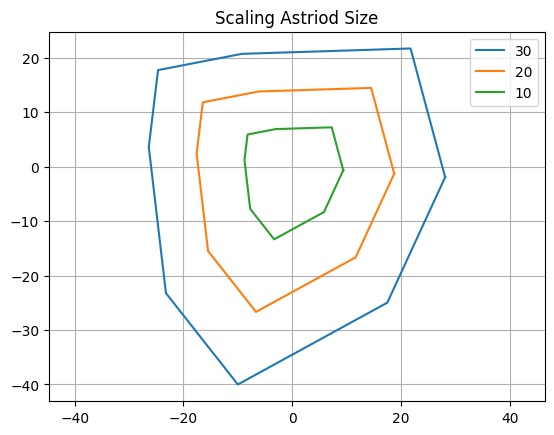

In [152]:
plt.plot(30*pts[:,0], 30*pts[:,1], label="30")
plt.plot(20*pts[:,0], 20*pts[:,1], label="20")
plt.plot(10*pts[:,0], 10*pts[:,1], label="10")
plt.legend()
plt.title("Scaling Astriod Size")
plt.grid(True)
plt.axis("equal");

In [156]:
import pygame
pygame.USEREVENT

pygame 2.5.2 (SDL 2.28.3, Python 3.11.6)
Hello from the pygame community. https://www.pygame.org/contribute.html


32866

In [158]:
type(pygame.USEREVENT)

int